In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/how-much-did-it-rain-ii/train.zip
/kaggle/input/how-much-did-it-rain-ii/test.zip
/kaggle/input/how-much-did-it-rain-ii/sample_dask.py
/kaggle/input/how-much-did-it-rain-ii/sample_solution.csv.zip


In [2]:
# Type declairation to minimize RAM consumption
col_list = ['minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected']
d = {c : np.float32 for c in col_list}

# EDA and Preprocessing

In [3]:
train = pd.read_csv("../input/how-much-did-it-rain-ii/train.zip", dtype=d)
train

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38.0,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42.0,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47.0,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,...,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52.0,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,...,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004


In [4]:
train.keys()

Index(['Id', 'minutes_past', 'radardist_km', 'Ref', 'Ref_5x5_10th',
       'Ref_5x5_50th', 'Ref_5x5_90th', 'RefComposite', 'RefComposite_5x5_10th',
       'RefComposite_5x5_50th', 'RefComposite_5x5_90th', 'RhoHV',
       'RhoHV_5x5_10th', 'RhoHV_5x5_50th', 'RhoHV_5x5_90th', 'Zdr',
       'Zdr_5x5_10th', 'Zdr_5x5_50th', 'Zdr_5x5_90th', 'Kdp', 'Kdp_5x5_10th',
       'Kdp_5x5_50th', 'Kdp_5x5_90th', 'Expected'],
      dtype='object')

In [5]:
train.loc[train["Id"] == 862571]

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
9999992,862571,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999993,862571,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999994,862571,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999995,862571,19.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999996,862571,24.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999997,862571,30.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999998,862571,36.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
9999999,862571,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
10000000,862571,48.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052
10000001,862571,53.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.710052


In [6]:
train.loc[train["Id"] == 5]

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
43,5,0.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
44,5,4.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
45,5,9.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
46,5,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
47,5,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
48,5,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
49,5,26.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
50,5,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
51,5,35.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439
52,5,39.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700439


In [7]:
train.isna().sum()

Id                              0
minutes_past                    0
radardist_km                    0
Ref                       7415826
Ref_5x5_10th              8481213
Ref_5x5_50th              7408719
Ref_5x5_90th              6213920
RefComposite              7048858
RefComposite_5x5_10th     8009528
RefComposite_5x5_50th     7053538
RefComposite_5x5_90th     5935998
RhoHV                     8830285
RhoHV_5x5_10th            9632047
RhoHV_5x5_50th            8828633
RhoHV_5x5_90th            7859617
Zdr                       8830285
Zdr_5x5_10th              9632047
Zdr_5x5_50th              8828633
Zdr_5x5_90th              7859617
Kdp                       9582566
Kdp_5x5_10th             10336419
Kdp_5x5_50th              9577920
Kdp_5x5_90th              8712425
Expected                        0
dtype: int64

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
train.fillna(0, inplace=True)
train[["minutes_past", "radardist_km", "Expected"]].describe()

,minutes_past,radardist_km,Expected
count,13765201.000,13765201.000,13765201.000
mean,29.369,11.292,106.863
std,17.194,4.125,540.209
min,0.000,0.000,0.010
25%,15.000,9.000,0.254
50%,30.000,11.000,1.016
75%,44.000,14.000,3.810
max,59.000,21.000,33017.730


Let's calculate the correlation matrix

In [10]:
corr_mat = train.corr()
corr_mat.style.background_gradient(cmap='coolwarm')

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
Id,1.000000,0.000514,0.003874,-0.010577,-0.011334,-0.010932,-0.009910,-0.012159,-0.013284,-0.012517,-0.011188,-0.004624,-0.007220,-0.004547,-0.001478,-0.002670,-0.003655,-0.007619,0.001580,0.000041,0.001653,-0.003456,0.002538,-0.001001
minutes_past,0.000514,1.000000,-0.001427,-0.011614,-0.007743,-0.011593,-0.015758,-0.014512,-0.010894,-0.014680,-0.018467,-0.003200,-0.003235,-0.003421,-0.002519,-0.001356,-0.000818,-0.003054,-0.000466,-0.000161,0.001268,0.000066,-0.001285,-0.000179
radardist_km,0.003874,-0.001427,1.000000,-0.300683,-0.294634,-0.305001,-0.320501,-0.354872,-0.358491,-0.359383,-0.362857,-0.440054,-0.406637,-0.445148,-0.479317,-0.205561,0.158697,-0.279073,-0.423519,-0.005695,0.159554,0.014708,-0.159615,0.106751
Ref,-0.010577,-0.011614,-0.300683,1.000000,0.926147,0.977953,0.935131,0.968278,0.922837,0.956721,0.911712,0.490526,0.503913,0.499322,0.475961,0.108119,-0.184197,0.166418,0.258770,0.003863,-0.350176,-0.029754,0.314141,-0.132867
Ref_5x5_10th,-0.011334,-0.007743,-0.294634,0.926147,1.000000,0.942866,0.863288,0.901493,0.964706,0.913786,0.839783,0.498631,0.525569,0.507391,0.471193,0.104753,-0.175550,0.169607,0.240681,0.004144,-0.365590,-0.019644,0.316078,-0.116487
Ref_5x5_50th,-0.010932,-0.011593,-0.305001,0.977953,0.942866,1.000000,0.946179,0.960922,0.942049,0.976204,0.922953,0.502835,0.517781,0.512031,0.486409,0.110008,-0.188316,0.170700,0.262296,0.003868,-0.360177,-0.030541,0.322815,-0.134032
Ref_5x5_90th,-0.009910,-0.015758,-0.320501,0.935131,0.863288,0.946179,1.000000,0.937114,0.879933,0.946205,0.979760,0.501041,0.501338,0.509967,0.499701,0.117354,-0.198739,0.169889,0.289926,0.003674,-0.347284,-0.039263,0.321919,-0.153962
RefComposite,-0.012159,-0.014512,-0.354872,0.968278,0.901493,0.960922,0.937114,1.000000,0.939021,0.982837,0.943340,0.513693,0.524046,0.523081,0.501411,0.122585,-0.193539,0.186792,0.286601,0.003060,-0.353181,-0.032450,0.317077,-0.140775
RefComposite_5x5_10th,-0.013284,-0.010894,-0.358491,0.922837,0.964706,0.942049,0.879933,0.939021,1.000000,0.952372,0.879946,0.525702,0.549326,0.535389,0.500445,0.122196,-0.188575,0.196385,0.273359,0.003186,-0.368504,-0.024002,0.319885,-0.125988
RefComposite_5x5_50th,-0.012517,-0.014680,-0.359383,0.956721,0.913786,0.976204,0.946205,0.982837,0.952372,1.000000,0.951126,0.523809,0.535215,0.533567,0.510104,0.124426,-0.197589,0.190562,0.290385,0.003142,-0.360899,-0.033039,0.323661,-0.141698


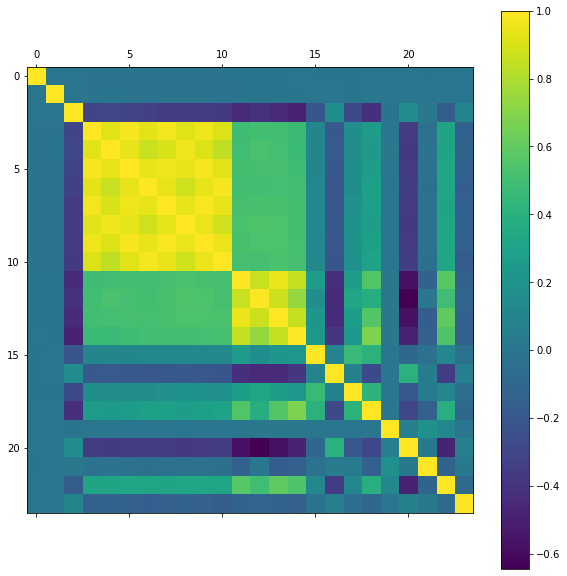

In [11]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 10))
plt.matshow(corr_mat, fignum=f.number)
plt.colorbar()

In the `Expected` column, the mean is about `106`, but 75% of the data is lower than `3.8`, and the max is `33017`. Our data has a lot of outliers. Let's plot them~!

In [12]:
train['Expected'].unique

<bound method Series.unique of 0          0.254
1          0.254
2          0.254
3          0.254
4          0.254
            ... 
13765196   8.636
13765197   8.636
13765198   8.636
13765199   8.636
13765200   8.636
Name: Expected, Length: 13765201, dtype: float32>

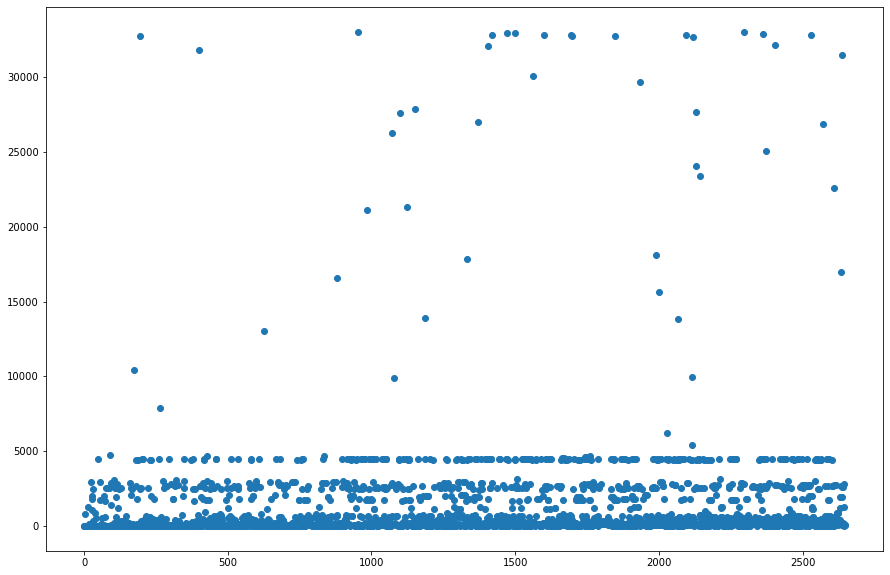

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(train["Expected"].unique())), train["Expected"].unique())

(array([2.392e+03, 2.130e+02, 2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 6.000e+00, 1.900e+01]),
 array([1.0000005e-02, 3.3017820e+03, 6.6035542e+03, 9.9053262e+03,
        1.3207099e+04, 1.6508871e+04, 1.9810643e+04, 2.3112414e+04,
        2.6414186e+04, 2.9715959e+04, 3.3017730e+04], dtype=float32),
 <a list of 10 Patch objects>)

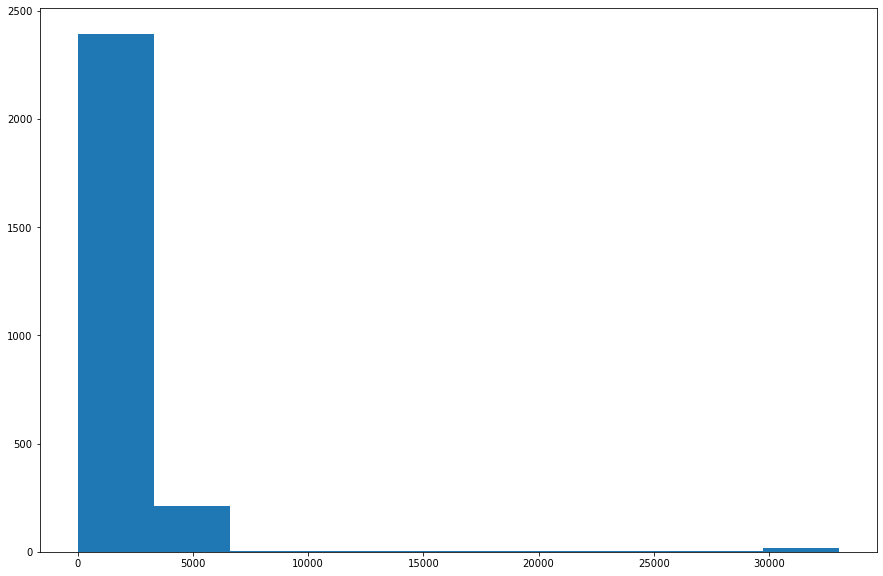

In [14]:
plt.figure(figsize=(15, 10))
plt.hist(train["Expected"].unique())

Now let's exclude the outliers. We will use `scipy.stats.precentileofscore` to calculate the percentile of a given number in the column. Let's try with `mean`.

In [15]:
from scipy import stats

print(stats.percentileofscore(train["Expected"], 106))

92.94511573060211


92% of the data is lower than `106`, which is about 1.279M rows, while our data has `13765201` rows. Let's exlude the outliers

In [16]:
train.drop(train[train["Expected"] >= 106].index, inplace=True)
train

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
1,1,16.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
2,1,25.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
3,1,35.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
4,1,45.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38.000,9.000,33.000,19.500,25.500,36.500,33.000,20.500,28.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.636
13765197,1180945,42.000,9.000,33.000,21.000,30.500,37.000,36.500,22.000,33.500,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.636
13765198,1180945,47.000,9.000,29.500,10.000,26.000,30.500,31.000,16.500,26.000,...,1.052,1.750,0.000,0.750,3.000,13.380,0.000,0.000,13.380,8.636
13765199,1180945,52.000,9.000,19.000,0.000,15.500,26.500,19.000,0.000,16.500,...,1.052,0.000,0.000,0.000,2.812,0.000,0.000,0.000,0.000,8.636


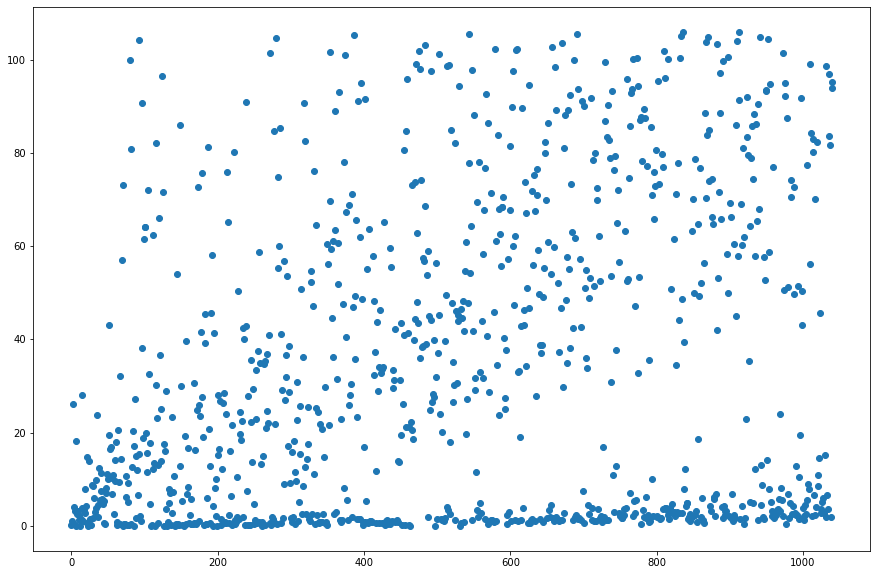

In [17]:
plt.figure(figsize=(15, 10))
plt.scatter(np.arange(len(train["Expected"].unique())), train["Expected"].unique())

(array([437.,  86.,  77.,  70.,  72.,  69.,  61.,  58.,  58.,  53.]),
 array([1.0000005e-02, 1.0600806e+01, 2.1191612e+01, 3.1782417e+01,
        4.2373222e+01, 5.2964031e+01, 6.3554836e+01, 7.4145645e+01,
        8.4736450e+01, 9.5327255e+01, 1.0591806e+02], dtype=float32),
 <a list of 10 Patch objects>)

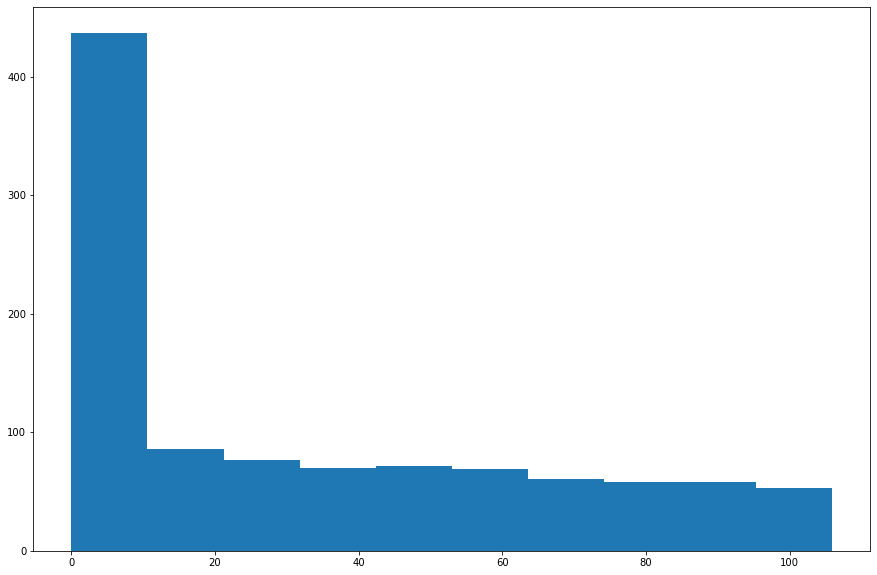

In [18]:
plt.figure(figsize=(15, 10))
plt.hist(train["Expected"].unique())

In [19]:
train_grouped = train.groupby('Id')
target = pd.DataFrame(train_grouped['Expected'].mean()) # mean, or any value, since they are the same in a group

In [20]:
target.reset_index(inplace=True)
target = target["Expected"]
target

0          0.254
1          1.016
2         26.162
3          4.064
4          0.254
           ...  
1080138    0.508
1080139    1.524
1080140    0.254
1080141    3.556
1080142    8.636
Name: Expected, Length: 1080143, dtype: float32

In [21]:
def pad_series(X, target_len=19):
    seq_len = X.shape[0]
    pad_size = target_len-seq_len
    if (pad_size > 0):
        X = np.pad(X, ((0,pad_size), (0,0)), 'constant', constant_values=0.)
    return X, seq_len

In [22]:
INPUT_WIDTH = 19
data_size = len(train_grouped)
X_train = np.empty((data_size, INPUT_WIDTH, 22))
seq_lengths = np.zeros(data_size)
y_train = np.zeros(data_size)

i = 0
for _, group in train_grouped:
    X = group.values
    seq_len = X.shape[0]
    X_train[i,:seq_len,:] = X[:,1:23]
    y_train[i] = X[0,23]
    i += 1
    del X
    
del train_grouped

In [23]:
X_train.shape

(1080143, 19, 22)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X_train, target, random_state=42, shuffle=True)

In [25]:
import tensorflow as tf

del X_train
del target

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
train_data = train_data.batch(32)
valid_data = valid_data.batch(32)

del x_train
del x_valid
del y_train
del y_valid

# Create and train the Model

In [27]:
import tensorflow as tf

def create_model(shape=(19, 22)):
    tfkl = tf.keras.layers
    model = tf.keras.Sequential([
        tfkl.Bidirectional((tfkl.LSTM(128, return_sequences=True)), input_shape=shape),
        tfkl.Bidirectional(tfkl.LSTM(64)),
        tfkl.Dense(64, activation="linear"),
        tfkl.Dense(1, activation="linear")
    ])
    
    model.compile(loss='mean_absolute_error', optimizer="adam",metrics=['accuracy']) #sparse_accuracy
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 19, 256)           154624    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 327,297
Trainable params: 327,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
#模型2
def create_model_2(shape=(19, 22)):
    tfkl = tf.keras.layers
    model = tf.keras.Sequential([
        tfkl.Bidirectional((tfkl.LSTM(256, return_sequences=True)), input_shape=shape),
        tfkl.Bidirectional(tfkl.LSTM(128)),
        tfkl.Dense(128, activation="linear"),
        tfkl.Dense(1, activation="linear")
    ])

    model.compile(loss='mean_absolute_error', optimizer="adam",metrics=['accuracy']) #sparse_accuracy
    return model

model_2 = create_model_2()
model_2.summary()

In [ ]:
import tensorflow as tf
#模型3
def create_model_3(shape=(19, 22)):
    tfkl = tf.keras.layers
    model = tf.keras.Sequential([
        tfkl.Bidirectional((tfkl.LSTM(128, return_sequences=True)), input_shape=shape),
        tfkl.Dense(128, activation="linear"),
        tfkl.Dense(1, activation="linear")
    ])

    model.compile(loss='mean_absolute_error', optimizer="adam",metrics=['accuracy']) #sparse_accuracy
    return model

model_3 = create_model_3()
model_3.summary()

In [31]:
import time
from matplotlib import pyplot

time_start=time.time()
epoch=2
history=model.fit(train_data, epochs=2, validation_data=valid_data,
          callbacks=[tf.keras.callbacks.ReduceLROnPlateau(), 
                    tf.keras.callbacks.EarlyStopping(patience = 10),
                    tf.keras.callbacks.ModelCheckpoint("model.h5", save_best_only=True)])

time_end=time.time()
time_sum=(time_end-time_start)/epoch
print(time_sum)
print(history.history['loss'])
print(history.history['val_loss'])
# print(history.history['acc'])
# print(history.history['val_acc'])


pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Epoch 1/2
25316/25316 [==============================] - 1061s 42ms/step - loss: 2.9384 - accuracy: 0.0000e+00 - val_loss: 2.9200 - val_accuracy: 0.0000e+00
Epoch 2/2
25316/25316 [==============================] - 1050s 41ms/step - loss: 2.9344 - accuracy: 0.0000e+00 - val_loss: 2.9254 - val_accuracy: 0.0000e+00
1059.0549679994583
[2.9383533000946045, 2.9344213008880615]
[2.919954538345337, 2.925370216369629]


KeyError: 'acc'

[2.9383533000946045, 2.9344213008880615]
[2.919954538345337, 2.925370216369629]


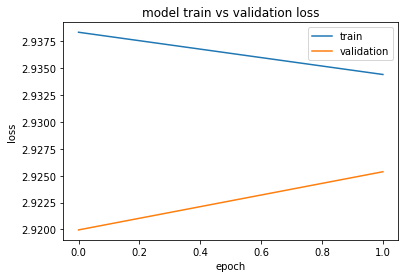

In [32]:
print(history.history['loss'])
print(history.history['val_loss'])
# print(history.history['acc'])
# print(history.history['val_acc'])


pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
col_list.pop()
d = {c: np.float32 for c in col_list}

test = pd.read_csv("../input/how-much-did-it-rain-ii/test.zip", dtype=d)
test[test.columns[1:]] = test[test.columns[1:]].astype(np.float32)
test_ids = test['Id'].unique()

# Convert all NaNs to zero
test = test.reset_index(drop=True)
test.fillna(0.0, inplace=True)
test_groups = test.groupby("Id")
test_size = len(test_groups)

X_test = np.zeros((test_size, INPUT_WIDTH, 22), dtype=np.float32)

i = 0
for _, group in test_groups:
    X = group.values
    seq_len = X.shape[0]
    X_test[i,:seq_len,:] = X[:,1:23]
    i += 1
    del X
    
del test_groups
X_test.shape

In [ ]:
submission = pd.read_csv("../input/how-much-did-it-rain-ii/sample_solution.csv.zip")
submission

# Make predictions

In [ ]:
model.load_weights("model.h5")
predictions = model.predict(X_test, batch_size=32)
submission["Expected"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import sklearn
kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model, x_train, y_train, cv = 5)
print(scores)